In [4]:
#A1

import pandas as pd
import numpy as np
def load(path,sheet_name,usecols):
    data = pd.read_excel(r"C:\Users\koppe\Downloads\Lab Session Data.xlsx",sheet_name='Purchase data',header=0,usecols="A:E")
    data=data.dropna(how='all')
    data.columns = data.columns.str.strip().str.lower()
    return data
def m(data):
    A = data[['candies (#)', 'mangoes (kg)', 'milk packets (#)']].values
    C = data['payment (rs)'].values.reshape(-1, 1)
    return A, C
def rank(A):
    return np.linalg.matrix_rank(A)
def c(A,C):
    A_inv=np.linalg.pinv(A)
    co=A_inv@C
    return co
if __name__ == "__main__":
    path = r'C:\Users\year3\Downloads\Lab Session Data.xlsx'
    sheet_name = 'Purchase data'
    usecols = 'A:E'

    data=load(path,sheet_name,usecols)
    A,C=m(data)
    r=rank(A)
    cv=c(A,C)
    dimension=A.shape[1]
    print("Dimensions:",dimension)
    vectors=A.shape[0]
    print("Vectors:",vectors)
    print("Rank of matrix A:",rank)
    print("cost of each product", cv.flatten())


Dimensions: 3
Vectors: 10
Rank of matrix A: <function rank at 0x00000251B1EC8C20>
cost of each product [ 1. 55. 18.]


Model Evaluation Report: (POOR=0,RICH=1):

              precision    recall  f1-score   support

        POOR       1.00      1.00      1.00         4
        RICH       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



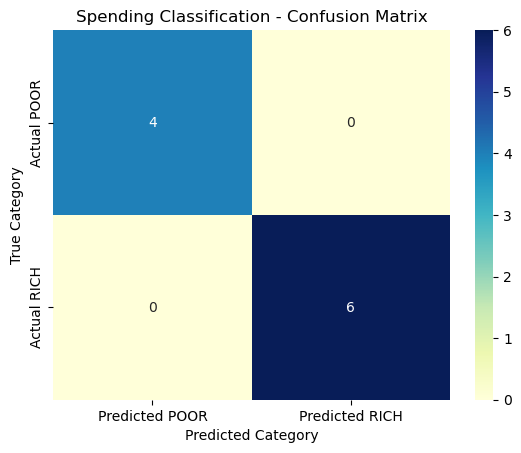

In [8]:
#A2
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def load_customer_purchase_data(path, sheet="Purchase data"):
    p_df = pd.read_excel(path, sheet_name=sheet)
    p_df = p_df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']]
    return p_df

def add_affordability_label(p_df, payment_limit=200):
    p_df['Affordability'] = p_df['Payment (Rs)'].apply(lambda payment: 1 if payment > payment_limit else 0)
    return p_df

def build_logistic_model(p_df):
    features = p_df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    target = p_df['Affordability'].values
    classifier = LogisticRegression()
    classifier.fit(features, target)
    return classifier

def display_model_performance(classifier, p_df):
    features = p_df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    actual_labels = p_df['Affordability'].values
    predicted_labels = classifier.predict(features)

    print("Model Evaluation Report: (POOR=0,RICH=1):\n")
    print(classification_report(actual_labels, predicted_labels, target_names=["POOR", "RICH"], zero_division=0))

    confusion = confusion_matrix(actual_labels, predicted_labels)
    sns.heatmap(confusion, annot=True, cmap='YlGnBu', fmt='d',xticklabels=["Predicted POOR", "Predicted RICH"],yticklabels=["Actual POOR", "Actual RICH"])
    plt.xlabel("Predicted Category")
    plt.ylabel("True Category")
    plt.title("Spending Classification - Confusion Matrix")
    plt.show()

if __name__ == "__main__":
    path = r"C:\Users\koppe\Downloads\Lab Session Data.xlsx"
    p_data = load_customer_purchase_data(path)
    labeled_data = add_affordability_label(p_data, payment_limit=200)
    spending_model = build_logistic_model(labeled_data)
    display_model_performance(spending_model, labeled_data)


Mean Price: 1560.66
Variance of Price: 58732.37
Mean Price on Wednesdays: 1550.71
Mean Price in April: 1698.95
Probability of Loss: 0.498
Probability of Profit on Wednesday: 0.42
Conditional Probability of Profit given Wednesday: 0.42


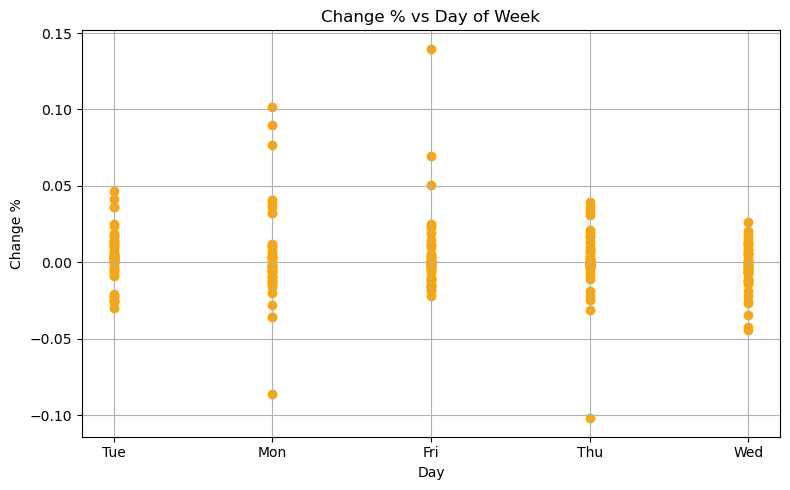

In [10]:
#A3
import pandas as pd
import statistics
import matplotlib.pyplot as plt

def irctc_data(path):
    df = pd.read_excel(path, sheet_name="IRCTC Stock Price")
    df.columns = df.columns.str.strip()
    df['Chg%'] = df['Chg%'].astype(str).str.replace('%', '').astype(float)
    return df

def basic_statistics(df):
    mean = statistics.mean(df['Price'])
    variance = statistics.variance(df['Price'])
    return mean, variance

def wednesday_mean(df):
    wednesday_prices = df[df['Day'] == 'Wed']['Price']
    return statistics.mean(wednesday_prices)

def april_mean(df):
    april_prices = df[df['Month'] == 'Apr']['Price']
    return statistics.mean(april_prices) if not april_prices.empty else None

def loss_probability(df):
    return (df['Chg%'] < 0).sum() / len(df)

def profit_on_wednesday(df):
    wed_df = df[df['Day'] == 'Wed']
    return (wed_df['Chg%'] > 0).sum() / len(wed_df)

def plot(df):
    plt.figure(figsize=(8, 5))
    plt.scatter(df['Day'], df['Chg%'], color='orange')
    plt.title("Change % vs Day of Week")
    plt.xlabel("Day")
    plt.ylabel("Change %")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    path = r"C:\Users\koppe\Downloads\Lab Session Data.xlsx"
    df = irctc_data(path)
    mean, variance = basic_statistics(df)
    mean_wednesday = wednesday_mean(df)
    mean_april = april_mean(df)
    loss_prob = loss_probability(df)
    wednesday_profit_probability = profit_on_wednesday(df)
    print("Mean Price:", round(mean, 2))
    print("Variance of Price:", round(variance, 2))
    print("Mean Price on Wednesdays:", round(mean_wednesday, 2))
    print("Mean Price in April:", round(mean_april, 2) if mean_april else "No April data")
    print("Probability of Loss:", round(loss_prob, 3))
    print("Probability of Profit on Wednesday:", round(wednesday_profit_probability, 3))
    print("Conditional Probability of Profit given Wednesday:", round(wednesday_profit_probability, 3))
    plot(df)


In [12]:
#A4
import pandas as pd
import numpy as np

def thyroid_data(path):
    df = pd.read_excel(path, sheet_name="thyroid0387_UCI")
    df.columns = df.columns.str.strip()
    df.replace('?', np.nan, inplace=True)
    return df

def classify_attributes(df):
    binary_cols = [col for col in df.columns if set(df[col].dropna().unique()) <= {'t', 'f'}]
    nominal_cols = ['sex', 'referral source']
    numeric_cols = ['Record ID', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
    target_col = ['Condition']
    return numeric_cols, binary_cols, nominal_cols, target_col

def attribute_types(numeric, binary, nominal, target):
    print("\nATTRIBUTE TYPES:")
    for col in numeric:
        print(f"{col} - Numeric")
    for col in binary:
        print(f"{col} - Binary")
    for col in nominal:
        print(f"{col} - Nominal")
    for col in target:
        print(f"{col} - Target")

def missing_values(df):
    print("\nMISSING VALUES:")
    for col in df.columns:
        missing = df[col].isna().sum()
        if missing > 0:
            print(f"{col}: {missing}")

def numeric_data(df, numeric_cols):
    print("\nNUMERIC STATS:")
    for col in numeric_cols:
        if col not in df.columns:
            continue
        df[col] = pd.to_numeric(df[col], errors='coerce')
        data = df[col].dropna()
        if data.empty:
            continue
        mn = data.min()
        mx = data.max()
        mean = round(data.mean(), 2)
        std = round(data.std(), 2)
        outliers = data[(data < mean - 3*std) | (data > mean + 3*std)]
        print(f"{col} -> Min: {mn}, Max: {mx}, Mean: {mean}, Std: {std}, Outliers: {len(outliers)}")

if __name__ == "__main__":
    path = r"C:\Users\koppe\Downloads\Lab Session Data.xlsx"
    df = thyroid_data(path)
    numeric_cols, binary_cols, nominal_cols, target_col = classify_attributes(df)
    attribute_types(numeric_cols, binary_cols, nominal_cols, target_col)
    missing_values(df)
    numeric_data(df, numeric_cols)



ATTRIBUTE TYPES:
Record ID - Numeric
age - Numeric
TSH - Numeric
T3 - Numeric
TT4 - Numeric
T4U - Numeric
FTI - Numeric
TBG - Numeric
on thyroxine - Binary
query on thyroxine - Binary
on antithyroid medication - Binary
sick - Binary
pregnant - Binary
thyroid surgery - Binary
I131 treatment - Binary
query hypothyroid - Binary
query hyperthyroid - Binary
lithium - Binary
goitre - Binary
tumor - Binary
hypopituitary - Binary
psych - Binary
TSH measured - Binary
T3 measured - Binary
TT4 measured - Binary
T4U measured - Binary
FTI measured - Binary
TBG measured - Binary
sex - Nominal
referral source - Nominal
Condition - Target

MISSING VALUES:
sex: 307
TSH: 842
T3: 2604
TT4: 442
T4U: 809
FTI: 802
TBG: 8823

NUMERIC STATS:
Record ID -> Min: 840801013, Max: 870119035, Mean: 852947346.61, Std: 7581968.78, Outliers: 0
age -> Min: 1, Max: 65526, Mean: 73.56, Std: 1183.98, Outliers: 3
TSH -> Min: 0.005, Max: 530.0, Mean: 5.22, Std: 24.18, Outliers: 100
T3 -> Min: 0.05, Max: 18.0, Mean: 1.97, St

In [14]:
#A5
import pandas as pd
import numpy as np

def binary_vectors(path):
    df = pd.read_excel(path, sheet_name="thyroid0387_UCI")
    df.columns = df.columns.str.strip()
    df.replace({'t': 1, 'f': 0, '?': np.nan}, inplace=True)

    binary_cols = [col for col in df.columns if set(df[col].dropna().unique()) <= {0, 1}]
    binary_df = df[binary_cols].dropna().reset_index(drop=True)

    vec1 = binary_df.iloc[0].astype(int).tolist()
    vec2 = binary_df.iloc[1].astype(int).tolist()

    return vec1, vec2

def jaccard_coefficient(v1, v2):
    f11 = sum(x == 1 and y == 1 for x, y in zip(v1, v2))
    f10 = sum(x == 1 and y == 0 for x, y in zip(v1, v2))
    f01 = sum(x == 0 and y == 1 for x, y in zip(v1, v2))
    return f11 / (f11 + f10 + f01)

def simple_matching_coefficient(v1, v2):
    matches = sum(x == y for x, y in zip(v1, v2))
    return matches / len(v1)

if __name__ == "__main__":
    path = r"C:\Users\koppe\Downloads\Lab Session Data.xlsx"
    vec1, vec2 = binary_vectors(path)

    jc = jaccard_coefficient(vec1, vec2)
    smc = simple_matching_coefficient(vec1, vec2)

    print("Vector 1:", vec1)
    print("Vector 2:", vec2)
    print(f"Jaccard Coefficient (JC): {round(jc, 3)}")
    print(f"Simple Matching Coefficient (SMC): {round(smc, 3)}")


Vector 1: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Vector 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
Jaccard Coefficient (JC): 0.25
Simple Matching Coefficient (SMC): 0.85


In [17]:
#A6
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def thyroid_numeric_vectors(path):
    df = pd.read_excel(path, sheet_name="thyroid0387_UCI")
    df.replace('?', np.nan, inplace=True)
    df.replace({'f': 0, 't': 1}, inplace=True)

    numeric_df = df.select_dtypes(include=[np.number]).dropna()
    
    vec1 = numeric_df.iloc[0].values.reshape(1, -1)
    vec2 = numeric_df.iloc[1].values.reshape(1, -1)
    return vec1, vec2

def C_cosine_similarity(vec1, vec2):
    return cosine_similarity(vec1, vec2)[0][0]

if __name__ == "__main__":
    path = r"C:\Users\koppe\Downloads\Lab Session Data.xlsx"
    vec1, vec2 = thyroid_numeric_vectors(path)
    similarity = C_cosine_similarity(vec1, vec2)
    
    print("Cosine Similarity:", round(similarity, 4))


Cosine Similarity: 1.0


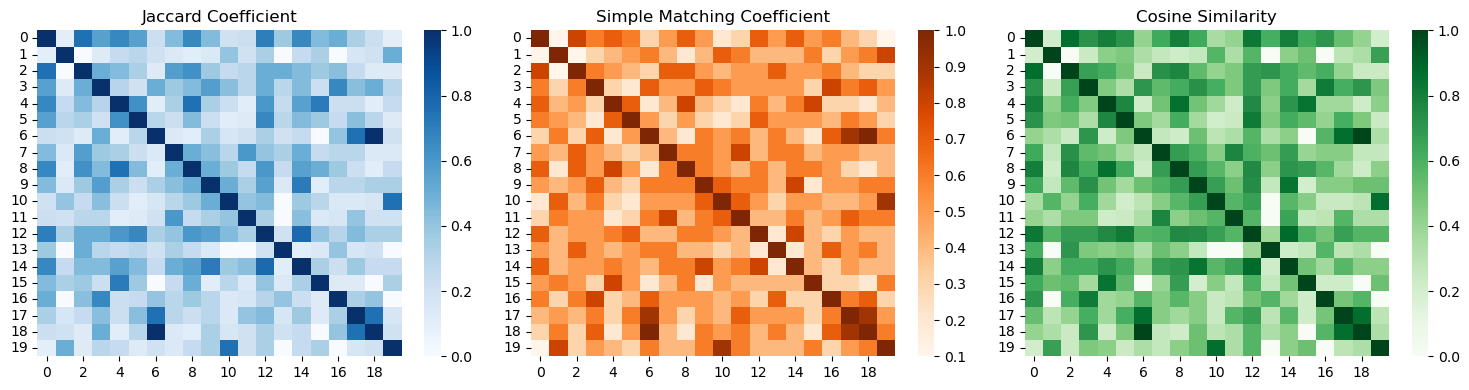

In [18]:
#A7
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def generate_binary_data(rows=20, cols=10, seed=0):
    np.random.seed(seed)
    return pd.DataFrame(np.random.choice([0, 1], size=(rows, cols)), columns=[f"A{i}" for i in range(cols)])

def c_jaccard_matrix(df):
    n = len(df)
    mat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            a, b = df.iloc[i], df.iloc[j]
            intersection = np.logical_and(a, b).sum()
            union = np.logical_or(a, b).sum()
            mat[i, j] = intersection / union if union else 0
    return pd.DataFrame(mat)

def c_smc_matrix(df):
    n = len(df)
    mat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            match = (df.iloc[i] == df.iloc[j]).sum()
            mat[i, j] = match / df.shape[1]
    return pd.DataFrame(mat)

def c_cosine_matrix(df):
    return pd.DataFrame(cosine_similarity(df))

def plot(jmat, smat, cmat):
    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    sns.heatmap(jmat, cmap='Blues')
    plt.title("Jaccard Coefficient")

    plt.subplot(1, 3, 2)
    sns.heatmap(smat, cmap='Oranges')
    plt.title("Simple Matching Coefficient")

    plt.subplot(1, 3, 3)
    sns.heatmap(cmat, cmap='Greens')
    plt.title("Cosine Similarity")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    df = generate_binary_data()
    jmat = c_jaccard_matrix(df)
    smat = c_smc_matrix(df)
    cmat = c_cosine_matrix(df)
    plot(jmat, smat, cmat)

In [20]:
#A8
import pandas as pd
import numpy as np
from scipy.stats import mode

def thyroid_data(path):
    df = pd.read_excel(path, sheet_name="thyroid0387_UCI")
    df.replace('?', np.nan, inplace=True)
    return df

def has_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return ((series < (q1 - 1.5 * iqr)) | (series > (q3 + 1.5 * iqr))).any()

def impute_column(col_data):
    try:
        col_data = pd.to_numeric(col_data, errors='coerce')
        if col_data.dtype in [np.float64, np.int64]:
            if has_outliers(col_data.dropna()):
                return col_data.fillna(col_data.median()), "Median"
            else:
                return col_data.fillna(col_data.mean()), "Mean"
        else:
            mod = mode(col_data.dropna())[0][0]
            return col_data.fillna(mod), "Mode"
    except:
        mod = mode(col_data.dropna())[0][0]
        return col_data.fillna(mod), "Mode"

def missing_values(df):
    strategies = {}
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            df[col], strategy = impute_column(df[col])
            strategies[col] = strategy
    return df, strategies

if __name__ == "__main__":
    path = r"C:\Users\koppe\Downloads\Lab Session Data.xlsx"
    df = thyroid_data(path)
    df_imputed, strategy_used = missing_values(df)

    print("\nImputation Summary:")
    for col, strategy in strategy_used.items():
        print(f"{col}: Filled with {strategy}")
    print("\nImputation Done.")



Imputation Summary:
sex: Filled with Mean
TSH: Filled with Median
T3: Filled with Median
TT4: Filled with Median
T4U: Filled with Median
FTI: Filled with Median
TBG: Filled with Median

Imputation Done.


In [22]:
#A9
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def thyroid_data(path):
    df = pd.read_excel(path, sheet_name="thyroid0387_UCI")
    df.replace('?', np.nan, inplace=True)
    df.replace({'f': 0, 't': 1}, inplace=True)
    return df

def numeric(df):
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='ignore')
    return df

def numeric_attributes(df):
    return df.select_dtypes(include=[np.number])

def for_normalization(df):
    stats = {}
    for col in df.columns:
        if df[col].isnull().sum() == 0:  # Only fully available data
            min_val, max_val = df[col].min(), df[col].max()
            if max_val - min_val > 10:  # Arbitrary threshold: large range
                stats[col] = (min_val, max_val)
    return stats
def normalize_attributes(df, method='minmax'):
    numeric_df = df.select_dtypes(include=[np.number]).copy()
    normalized_df = numeric_df.copy()

    if method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'zscore':
        scaler = StandardScaler()
    else:
        raise ValueError("Method must be 'minmax' or 'zscore'")

    normalized_df.loc[:, :] = scaler.fit_transform(numeric_df)
    return normalized_df

if __name__ == "__main__":
    path = r"C:\Users\koppe\Downloads\Lab Session Data.xlsx"
    df = thyroid_data(path)
    df = numeric(df)
    numeric_df = numeric_attributes(df).dropna()
    print("\nAttributes with Large Ranges Needing Normalization:")
    to_normalize = for_normalization(numeric_df)
    for col, (min_val, max_val) in to_normalize.items():
        print(f"{col}: Range = {round(min_val, 2)} to {round(max_val, 2)}")
    normalized_df = normalize_attributes(numeric_df, method='minmax')
    print("\nPreview of Normalized Data (Min-Max Scaling):")
    print(normalized_df.head())



Attributes with Large Ranges Needing Normalization:
Record ID: Range = 840827019 to 861217037
age: Range = 21 to 97
TSH: Range = 0.07 to 70.0
TT4: Range = 3.9 to 280.0
FTI: Range = 5.0 to 356.0
TBG: Range = 15.0 to 86.0

Preview of Normalized Data (Min-Max Scaling):
      Record ID       age  on thyroxine  query on thyroxine  \
167    0.000000  0.250000             0                   0   
5256   0.505199  0.184211             0                   0   
6044   0.955274  0.736842             0                   0   
6045   0.955274  0.684211             0                   0   
6681   0.961303  0.750000             0                   0   

      on antithyroid medication  sick  pregnant  thyroid surgery  \
167                           0     0         0                0   
5256                          0     0         0                1   
6044                          0     0         0                0   
6045                          0     0         0                0   
6681         